In [1]:
#install dependencies
#----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("tab10", 10)

from itertools import chain

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
filename = '../data_processed/csv/wisconsin_clean.csv'
df=pd.read_csv(filename, index_col=0)
df

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [14]:
feat_mean = np.mean(df['clump_thickness'])
print(feat_mean)

4.44216691068814


In [25]:
np.random.seed(121)
samples_50 = df['clump_thickness'].sample(50, replace=True)
samples_100 = df['clump_thickness'].sample(100, replace=True)
samples_250 = df['clump_thickness'].sample(250, replace=True)
samples_500 = df['clump_thickness'].sample(500, replace=True)

print(f'The mean of the observed population is: {feat_mean:.2f}; mean for 50 samples is: {np.mean(samples_50):.2f},\
    for 100 samples is: {np.mean(samples_100):.2f},for 250 samples is: {np.mean(samples_250):.2f},\
        and for 500 samples is: {np.mean(samples_500):.2f}.')

The mean of the observed population is: 4.44; mean for 50 samples is: 4.74,    for 100 samples is: 4.22,for 250 samples is: 4.55,        and for 500 samples is: 4.47.


## Correlation of Features
Since there are features where some of the scores have less than 5 in frequency, a chi-square cannot be performed. Since the values for scores are ordinal from 1-10 and equally spaced by 1, then it will be treated as numerical. Pearson's correlation, Spearman's rho and Kendall's tau will be done with the data.

In [5]:
df_ben = df[df['class']==2]
df_ben

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
690,1,1,1,3,2,1,1,1,1,2
692,3,1,1,1,2,1,1,1,1,2
693,3,1,1,1,2,1,2,1,2,2
694,3,1,1,1,3,2,1,1,1,2


In [6]:
df_mal = df[df['class']==4]
df_mal

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
5,8,10,10,8,7,10,9,7,1,4
12,5,3,3,3,2,3,4,4,1,4
14,8,7,5,10,7,9,5,5,4,4
15,7,4,6,4,6,1,4,3,1,4
18,10,7,7,6,4,10,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...
681,5,10,10,10,4,10,5,6,3,4
691,5,10,10,5,4,5,4,4,1,4
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [7]:
corr_dropped = df.corr()
corr_dropped

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
uniformity_cell_size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
uniformity_cell_shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_epithelial_cell_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


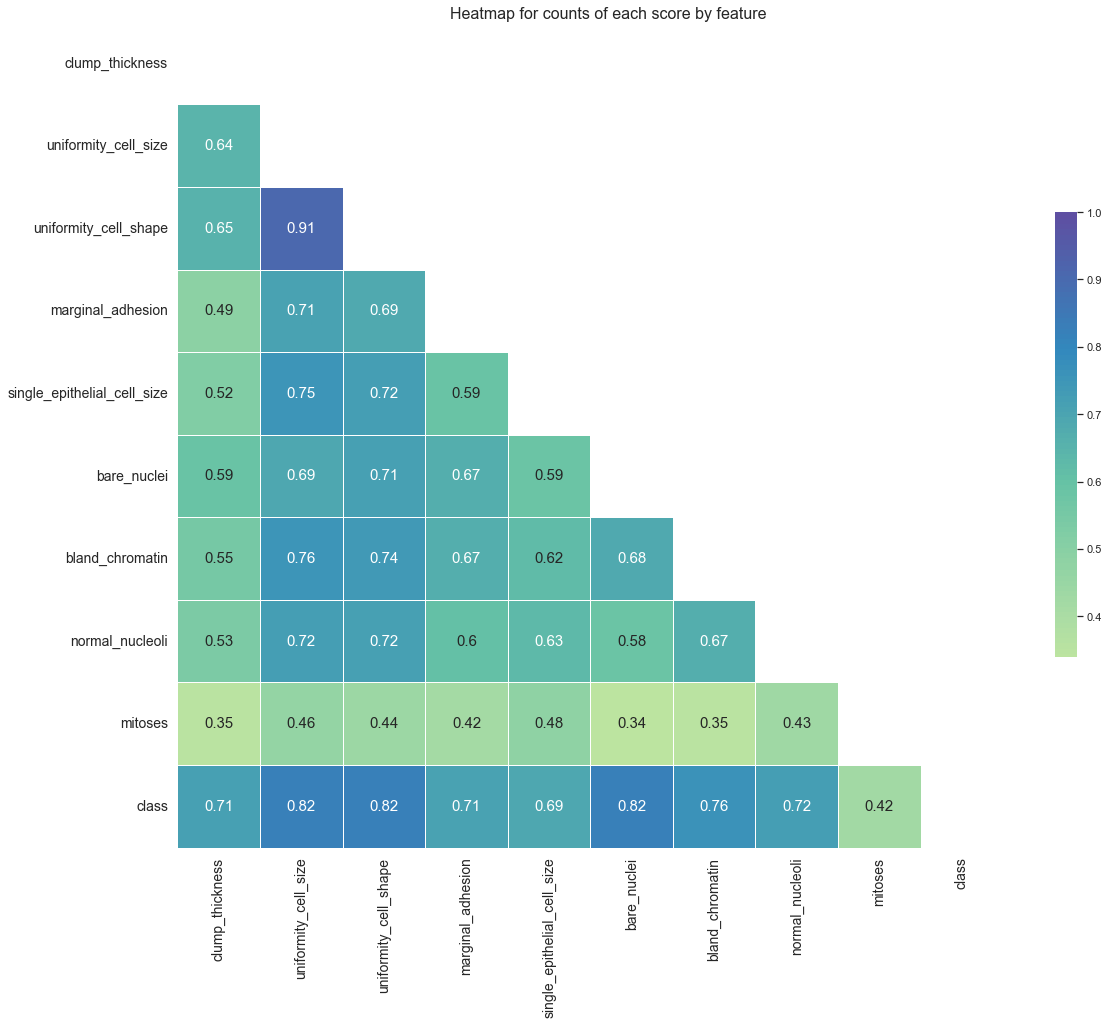

In [33]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_dropped, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_dropped, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for correlation matrix for all features", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
# fig.savefig('../images/exploratory_analysis/heatmap_counts_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [8]:
corr_df_ben = df_ben.corr()
corr_df_ben = corr_df_ben.drop(columns=['class'])
corr_df_ben = corr_df_ben.dropna()
corr_df_ben

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
clump_thickness,1.000000,0.275855,0.298429,0.255388,0.158063,0.115207,0.100785,0.205244,-0.039594
uniformity_cell_size,0.275855,1.000000,0.696421,0.281418,0.409948,0.461013,0.264898,0.487685,0.047185
uniformity_cell_shape,0.298429,0.696421,1.000000,0.239653,0.344502,0.358815,0.194651,0.390216,-0.000083
marginal_adhesion,0.255388,0.281418,0.239653,1.000000,0.292839,0.373200,0.116239,0.254664,0.062491
single_epithelial_cell_size,0.158063,0.409948,0.344502,0.292839,1.000000,0.332888,0.152628,0.437988,-0.015829
bare_nuclei,0.115207,0.461013,0.358815,0.373200,0.332888,1.000000,0.205968,0.308704,0.120092
bland_chromatin,0.100785,0.264898,0.194651,0.116239,0.152628,0.205968,1.000000,0.343546,-0.043424
normal_nucleoli,0.205244,0.487685,0.390216,0.254664,0.437988,0.308704,0.343546,1.000000,0.057632
mitoses,-0.039594,0.047185,-0.000083,0.062491,-0.015829,0.120092,-0.043424,0.057632,1.000000


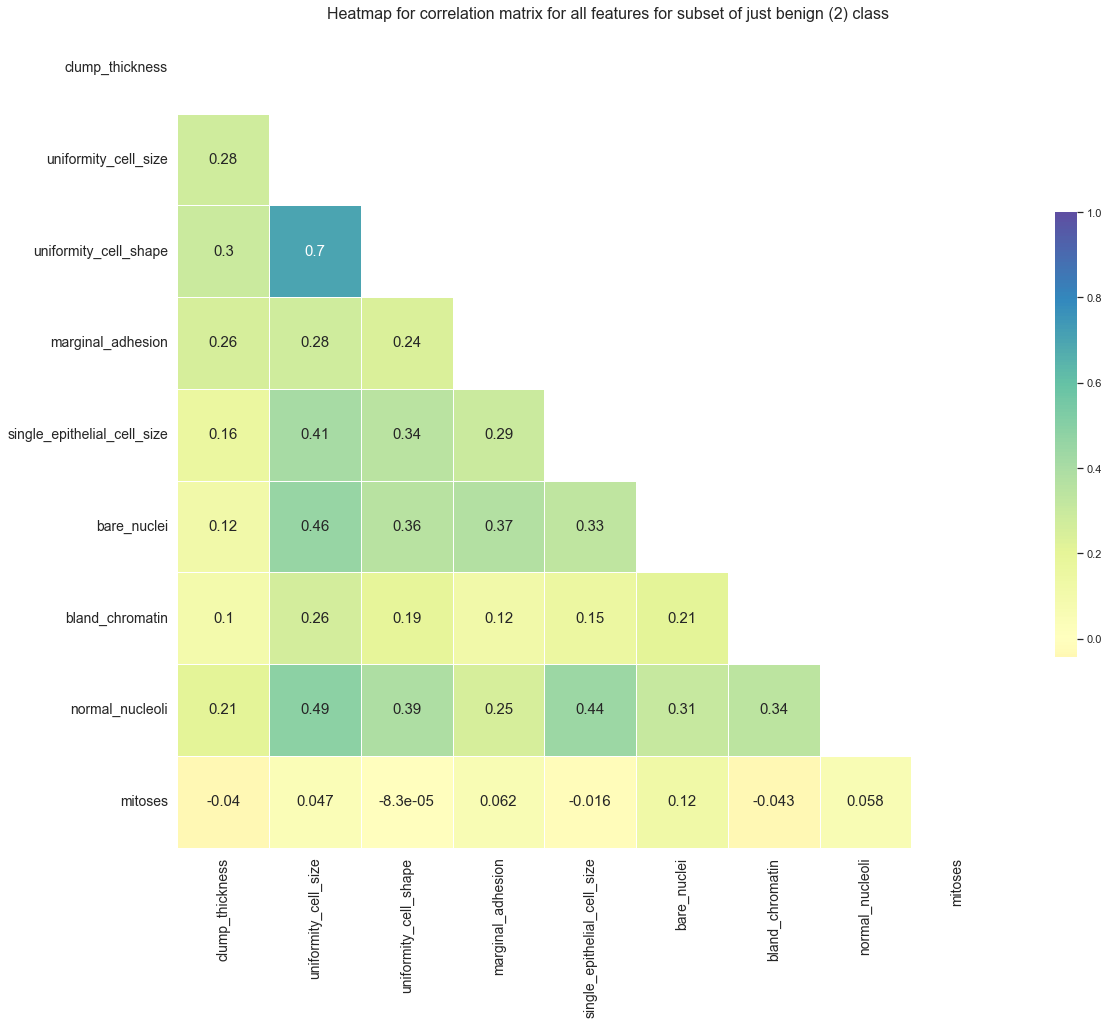

In [38]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df_ben, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_df_ben, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for correlation matrix for all features for subset of just benign (2) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
# fig.savefig('../images/exploratory_analysis/heatmap_counts_plots.png', bbox_inches='tight',dpi=600)
plt.show()

In [9]:
corr_df_mal = df_mal.corr()
corr_df_mal = corr_df_mal.drop(columns=['class'])
corr_df_mal = corr_df_mal.dropna()
corr_df_mal

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
clump_thickness,1.000000,0.097438,0.112548,-0.144148,0.017152,-0.036078,-0.018025,-0.013174,0.118206
uniformity_cell_size,0.097438,1.000000,0.720782,0.320449,0.460828,-0.039891,0.388866,0.299189,0.241080
uniformity_cell_shape,0.112548,0.720782,1.000000,0.267325,0.383091,0.052947,0.338472,0.309652,0.209983
marginal_adhesion,-0.144148,0.320449,0.267325,1.000000,0.192775,0.193632,0.337764,0.184831,0.201249
single_epithelial_cell_size,0.017152,0.460828,0.383091,0.192775,1.000000,-0.031428,0.216225,0.231148,0.333305
bare_nuclei,-0.036078,-0.039891,0.052947,0.193632,-0.031428,1.000000,0.136894,-0.083194,-0.037522
bland_chromatin,-0.018025,0.388866,0.338472,0.337764,0.216225,0.136894,1.000000,0.253494,0.059304
normal_nucleoli,-0.013174,0.299189,0.309652,0.184831,0.231148,-0.083194,0.253494,1.000000,0.222353
mitoses,0.118206,0.241080,0.209983,0.201249,0.333305,-0.037522,0.059304,0.222353,1.000000


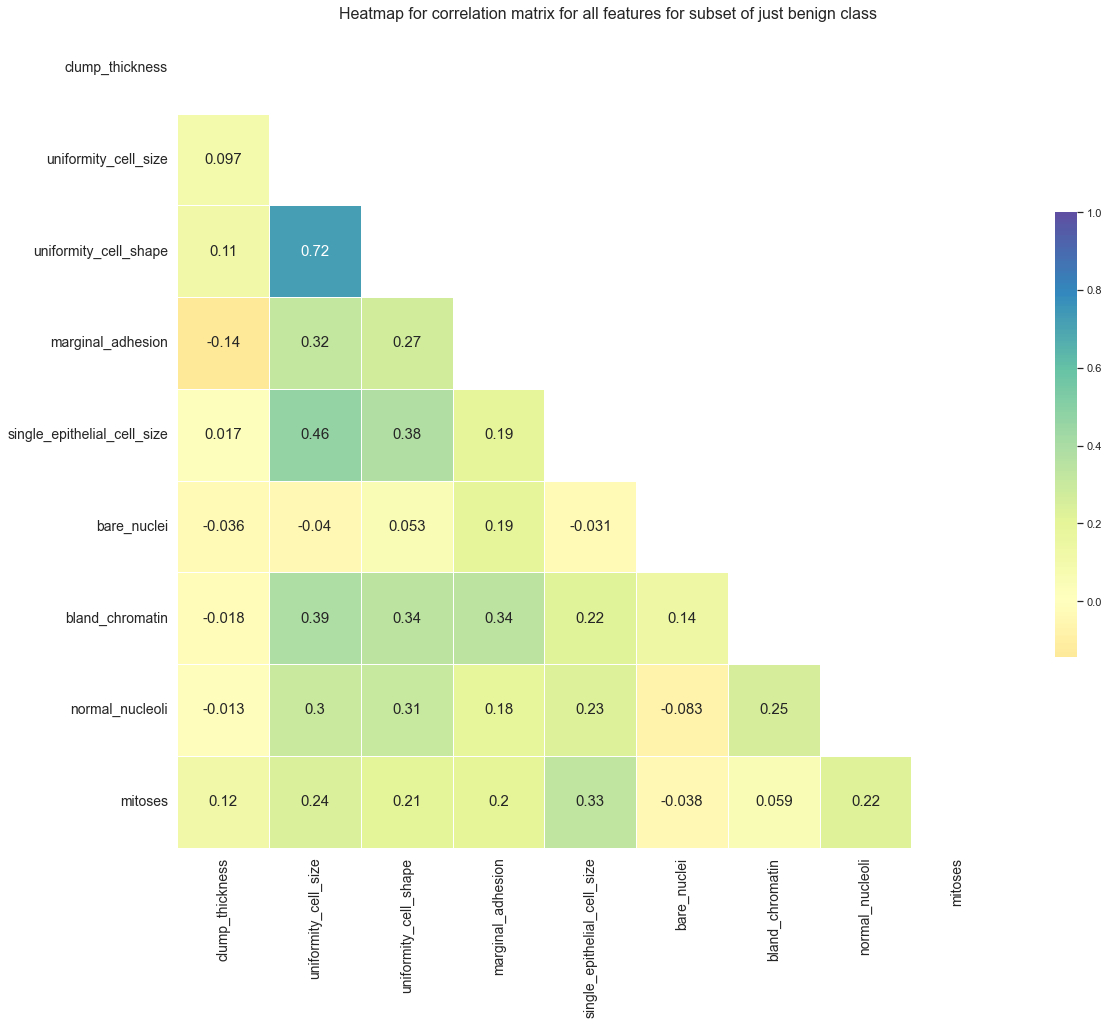

In [37]:
# #create heatmap correlation matrix

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df_mal, dtype=bool))

fig = plt.figure(figsize=[17,15])
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(corr_df_mal, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 15})
fig.suptitle("Heatmap for correlation matrix for all features for subset of just malignant (4) class", y=0.95, fontsize=16)
plt.yticks(fontsize=14, rotation=0)
plt.xticks(fontsize=14)

plt.tight_layout()
# fig.savefig('../images/exploratory_analysis/heatmap_counts_plots.png', bbox_inches='tight',dpi=600)
plt.show()